**Подключаем библиотеки и датасет**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

df  = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Обработка пропусков и удаление ненужных столбцов

In [87]:
# Удаление строк, где все значения NaN
df.dropna(how='all', inplace=True)

# Удаление столбца 'RiskScore'
df = df.drop('RiskScore', axis=1)

# Заполнение пропусков в данных типа object
most_common_loan_purpose = df['LoanPurpose'].mode()[0]
df['LoanPurpose'] = df['LoanPurpose'].fillna(most_common_loan_purpose)

# Удаление столбца 'ApplicationDate'
df = df.drop('ApplicationDate', axis=1)
df_test = df_test.drop('ApplicationDate', axis=1)

Кодирование категориальных переменных

In [88]:
# Преобразование категориальных переменных в числовые
df = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus'], drop_first=True)

# Кодирование переменной 'EducationLevel'
encoder = LabelEncoder()
df['EducationLevel_encoded'] = encoder.fit_transform(df['EducationLevel'])
df = df.drop('EducationLevel', axis=1)

df_test['EducationLevel_encoded'] = encoder.transform(df_test['EducationLevel'])
df_test = df_test.drop('EducationLevel', axis=1)

Импутация пропусков и удаление коррелирующих признаков

In [89]:
# Импутация пропусков методом K-ближайших соседей
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Удаление сильно коррелирующих признаков
columns_to_drop = ['TotalAssets', 'AnnualIncome', 'BaseInterestRate', 'InterestRate', 'LoanAmount', 'Experience', 'CreditScore']
df = df.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

Разделение данных на признаки и целевую переменную

In [90]:
# Разделение данных на признаки и целевую переменную
y_train = df['LoanApproved']
X_train = df.drop('LoanApproved', axis=1)

y_test = df_test['LoanApproved']
X_test = df_test.drop(['ID', 'LoanApproved'], axis=1)


**Визуализация данных**

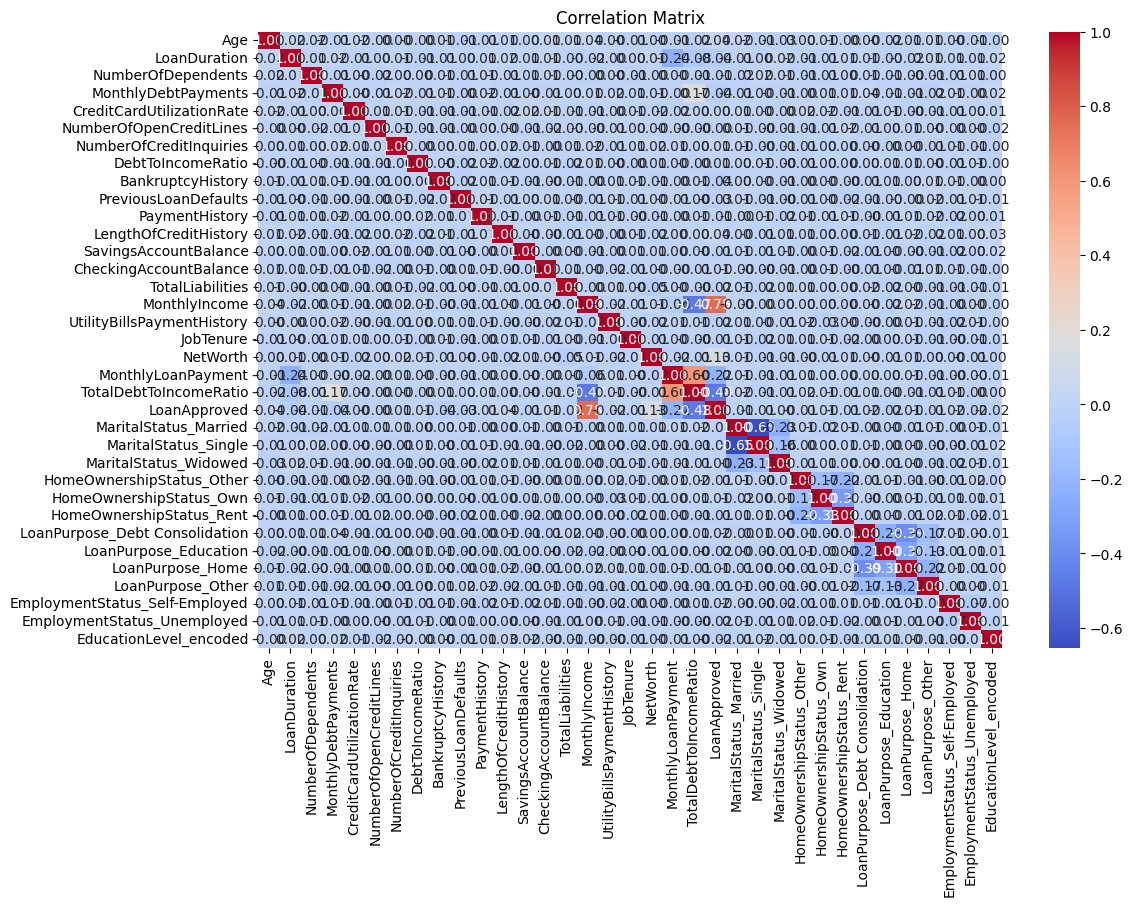

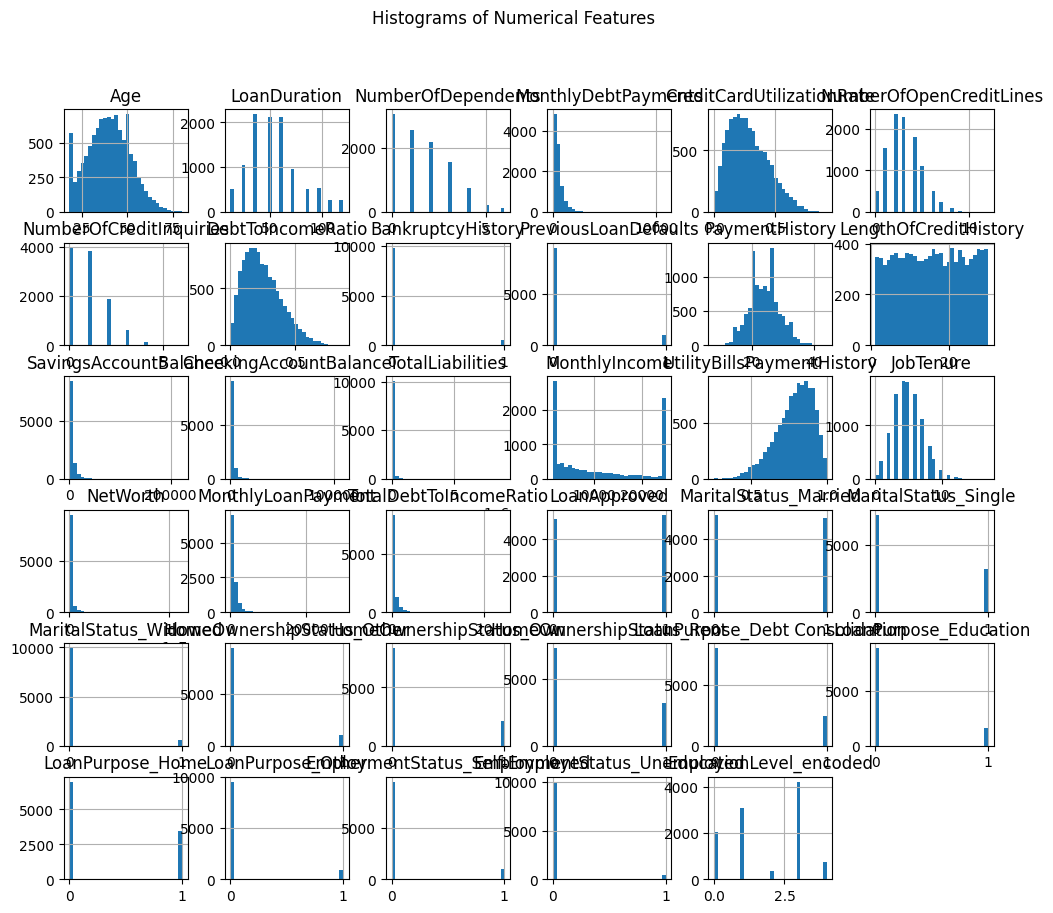

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Гистограммы
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()


Масштабирование данных

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
import numpy as np

class LinearLogisticClassifier:
    def __init__(self, model_type='lin', lr=0.01, max_iter=1000):
        self.model_type = model_type
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.model_type == 'log':
                y_predicted = self._sigmoid(linear_model)
            else:
                y_predicted = linear_model

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        if self.model_type == 'log':
            y_predicted = self._sigmoid(linear_model)
            return [1 if i > 0.5 else 0 for i in y_predicted]
        else:
            return linear_model

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


[LightGBM] [Info] Number of positive: 5367, number of negative: 5120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3038
[LightGBM] [Info] Number of data points in the train set: 10487, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511776 -> initscore=0.047115
[LightGBM] [Info] Start training from score 0.047115


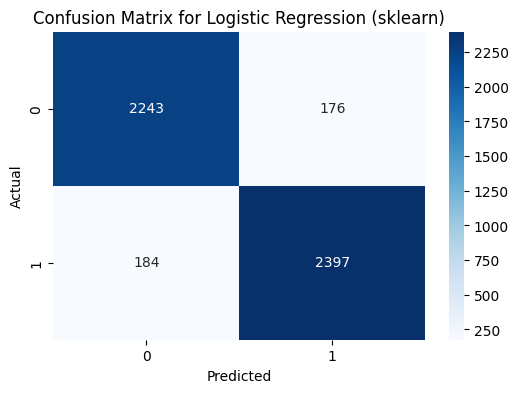

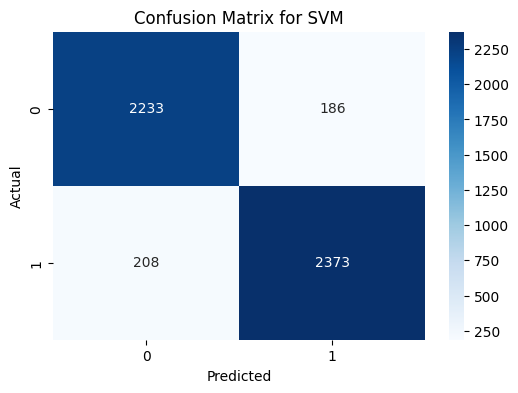

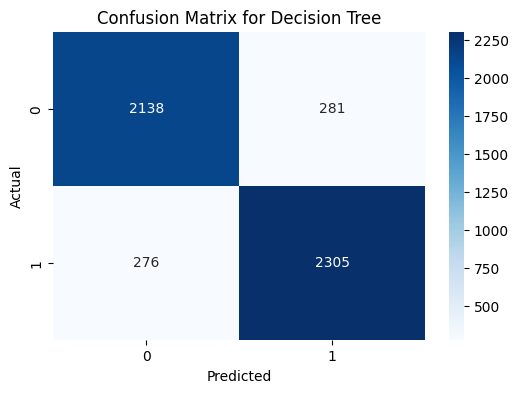

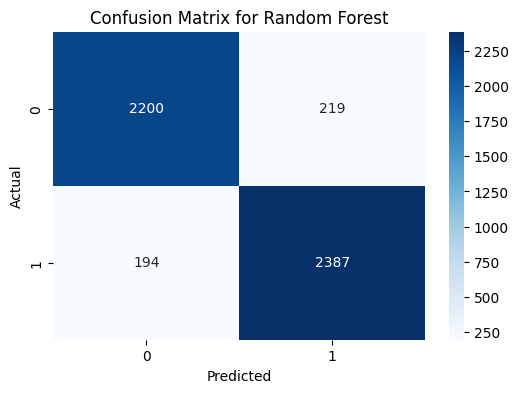

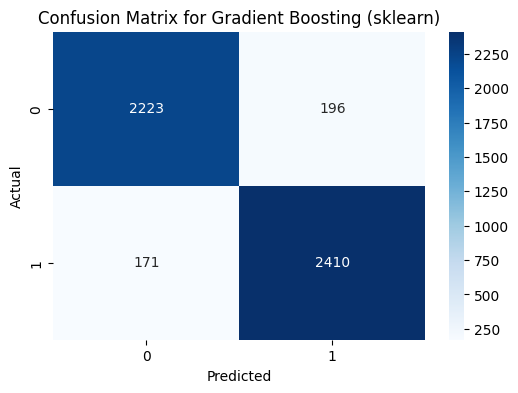

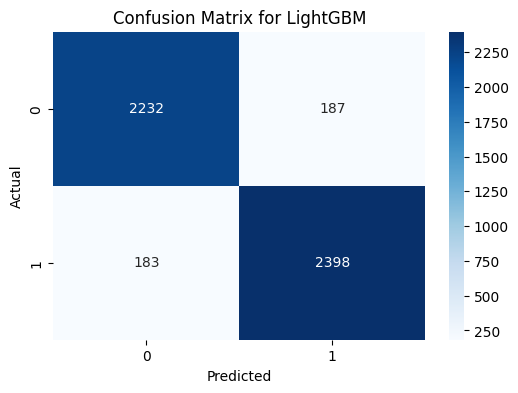

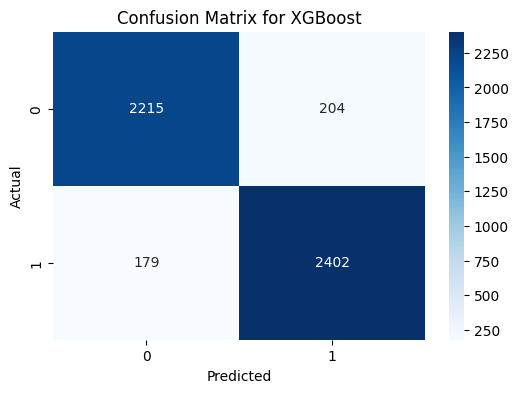

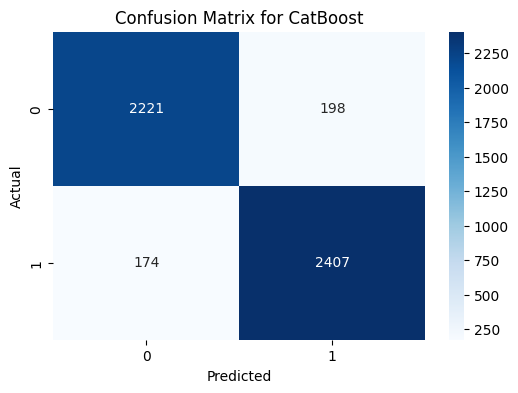

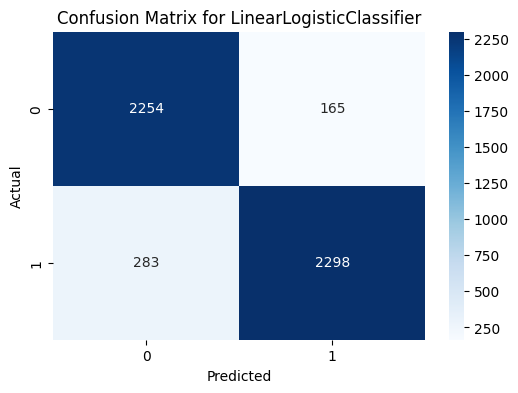

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных
models = {
    'Logistic Regression (sklearn)': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting (sklearn)': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LinearLogisticClassifier': LinearLogisticClassifier(model_type='log')
}

# Обучение и предсказание
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        # Если модель возвращает вероятности, используем predict_proba
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)  # Преобразование вероятностей в метки
    else:
        y_pred = model.predict(X_test)
    results[name] = y_pred

# Вычисление метрик
metrics = {}
for name, y_pred in results.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    metrics[name] = {'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}

# Визуализация матрицы ошибок
for name, y_pred in results.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()